In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
adult = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = ['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label'])
adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
#How many males and females are there?
adult['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [49]:
#What is the mean male age?
adult[adult['sex'] == ' Male'].age.mean()

39.43354749885268

In [55]:
#What is the proportion of the US citizens?
(adult[adult['native-country'] == ' United-States'].count()/adult.count())['native-country']

0.89585700684868397

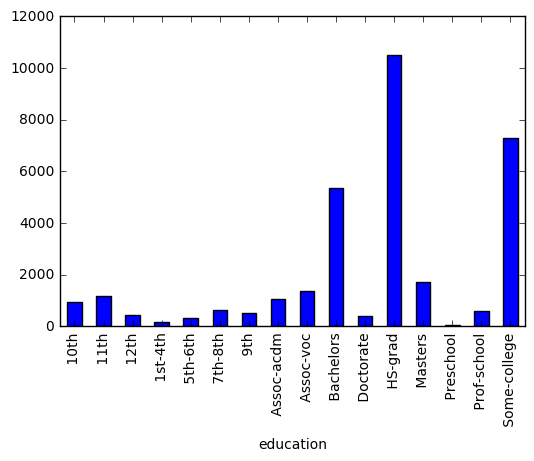

In [25]:
#Plot the distribution of people’s education as a bar plot.
edu = adult.groupby('education').size()
edu.plot(kind='bar')

In [57]:
#What is the mean and standard deviation of the ”final weight” for divorced people?
print (adult[adult['marital-status'] == ' Divorced'].fnlwgt.mean())
print (adult[adult['marital-status'] == ' Divorced'].fnlwgt.std())

185802.79045689848
105646.78945933603


In [33]:
#Is it true that the people who receive over 50k are mostly highly educated?
over50 = adult[adult['label'] == ' >50K']
over50_he = over50[over50['education'].isin([' Masters',' Bachelors',' Doctorate'])]
True if (over50_he.size/over50.size > 0.5) else False

False

In [59]:
#What is the maximum male and female age for each race?
adult.groupby(['race', 'sex']).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

In [34]:
#The people from which countries work as farmers/fishers?
adult[adult['occupation'] == ' Farming-fishing'].groupby('native-country').size()

native-country
 ?                  5
 Cambodia           1
 Canada             2
 Cuba               2
 El-Salvador        2
 England            1
 France             1
 Germany            1
 Guatemala          4
 Hong               1
 Ireland            1
 Italy              2
 Japan              1
 Mexico            77
 Philippines        4
 Poland             1
 Portugal           1
 Puerto-Rico        5
 United-States    879
 Vietnam            2
 Yugoslavia         1
dtype: int64

In [6]:
#consider  the  ratio  of  the  number  of  1)  male  bachelors  to  male  masters,  and  2)  female bachelors to female masters.  Which one is higher?
edu1_mb = adult[(adult['sex'] == ' male') & (adult['education'] == ' bachelor')].size
edu2_mm = adult[(adult['sex'] == ' male') & (adult['education'] == ' master')].size
edu1_fb = adult[(adult['sex'] == ' female') & (adult['education'] == ' bachelor')].size
edu2_fm = adult[(adult['sex'] == ' female') & (adult['education'] == ' master')].size

print ('Male') if (edu1_mb / edu2_mm > edu1_fb / edu2_fm) else print ("Female")

Female


In [12]:
# What is the largest number of hours a person works a week?  How many people who work this number of hours are there?  What is their income?
max_hours = adult['hours-per-week'].max()
print(max_hours)
workers = adult[adult['hours-per-week'] == max_hours]
print(workers.size)
#Доход поняла как разницу между приростом и убылью капитала
print (workers['capital-gain'].mean() - workers['capital-loss'].mean())

99
1275
673.8117647058823
